<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/Monte%20carlo%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# If you're in Jupyter, this makes plots show under the cell:
# %matplotlib inline

In [ ]:
def simulate_gbm_paths(S0, mu, sigma, T, dt, n_sims):
    """
    Simulate stock price paths using Geometric Brownian Motion (GBM).

    Parameters
    ----------
    S0 : float
        Initial stock price.
    mu : float
        Expected return (drift) per year.
    sigma : float
        Volatility (standard deviation of returns) per year.
    T : float
        Total time in years to simulate (e.g., 1 year).
    dt : float
        Time step in years (e.g., 1/252 for daily steps).
    n_sims : int
        Number of simulated paths.

    Returns
    -------
    paths : ndarray of shape (n_steps + 1, n_sims)
        Simulated price paths.
    """
    n_steps = int(T / dt)  # number of time steps
    paths = np.zeros((n_steps + 1, n_sims))
    paths[0] = S0

    # Precompute constants
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion_scale = sigma * np.sqrt(dt)

    for t in range(1, n_steps + 1):
        # Generate standard normal random numbers
        z = np.random.randn(n_sims)
        # GBM formula
        paths[t] = paths[t - 1] * np.exp(drift + diffusion_scale * z)

    return paths


In [ ]:
def plot_price_paths(paths, title="Monte Carlo Simulated Stock Price Paths", n_paths_to_plot=10):
    """
    Plot some of the simulated stock price paths.

    Parameters
    ----------
    paths : ndarray
        Output from simulate_gbm_paths (shape: (n_steps+1, n_sims)).
    title : str
        Title for the plot.
    n_paths_to_plot : int
        How many paths to plot (max is number of columns in paths).
    """
    n_steps_plus_one, n_sims = paths.shape
    n_to_plot = min(n_paths_to_plot, n_sims)

    plt.figure(figsize=(10, 5))
    for i in range(n_to_plot):
        plt.plot(paths[:, i])

    plt.xlabel("Time step")
    plt.ylabel("Stock price")
    plt.title(title)
    plt.grid(True)
    plt.show()


In [ ]:
def summarize_final_prices(paths):
    """
    Print basic statistics for the final simulated prices.

    Parameters
    ----------
    paths : ndarray
        Output from simulate_gbm_paths.
    """
    final_prices = paths[-1]

    mean_price = np.mean(final_prices)
    median_price = np.median(final_prices)
    p5 = np.percentile(final_prices, 5)
    p95 = np.percentile(final_prices, 95)

    print("Summary of final simulated prices:")
    print(f"Mean   : {mean_price:.2f}")
    print(f"Median : {median_price:.2f}")
    print(f"5th pct: {p5:.2f}")
    print(f"95th pct: {p95:.2f}")


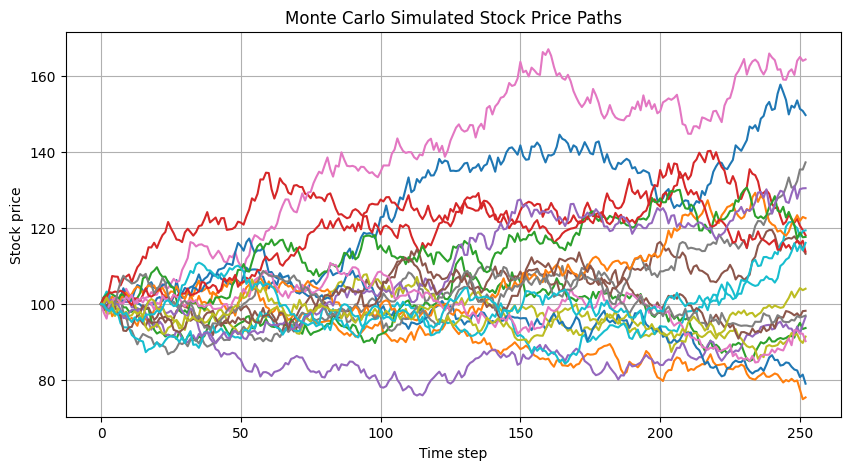

Summary of final simulated prices:
Mean   : 110.53
Median : 108.97
5th pct: 76.35
95th pct: 150.68


In [ ]:
# Parameters
S0 = 100        # current stock price
mu = 0.10       # expected annual return (10%)
sigma = 0.2     # annual volatility (20%)
T = 1.0         # 1 year into the future
dt = 1/252      # daily steps (252 trading days)
n_sims = 1000   # number of simulated price paths

# Run simulation
paths = simulate_gbm_paths(S0, mu, sigma, T, dt, n_sims)

# Plot a few paths
plot_price_paths(paths, n_paths_to_plot=20)

# Show summary statistics for final prices
summarize_final_prices(paths)
